### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**The Independent variable is whether the word is congruent or incongruent. **

**The Dependent variable is the time it takes to name the ink color**

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**since the time it takes to name the ink color is being recorded. our dataset will have two groups;**

**Group 1: The mean records of times for congruent words ($\mu_{c}$)**

**Group 2: The mean records of times for incongruent words ($\mu_{i}$)**

**The set of hypotheses for this task can be whether the difference in mean between the two groups equals zero or not.**


**Our null hypotheses is that the mean time to name a congruent word is not significantly longer than the mean time to name an incongruent work, which can be represented as:**


__$$H_0: \mu_{c} - \mu_{i} \ge 0$$__
__$$H_1: \mu_{c} - \mu_{i} \lt 0$$__

**Since we are going to compare between two dependent variables (the mean time) we can use paired T-test statistical test to conclude the decision to accept or reject the null hypothesis.**


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [2]:
#query the mean values
mean_c = df.mean()['Congruent']
mean_i = df.mean()['Incongruent']
mean_c, mean_i

(14.051125000000004, 22.015916666666669)

In [3]:
# Mean difference
mean_diff = mean_c - mean_i
mean_diff

-7.9647916666666649

**Measure of central tendency:**

**The sample mean of the congruent group = 14.051125**

**The sample mean of the incongruent group = 22.015917**

**The sample mean difference between the two groups = -7.9648**

In [5]:
#query the standard deviation values
std_c = np.std(df['Congruent'],ddof=1)
std_i = np.std(df['Incongruent'],ddof=1)

std_c, std_i

(3.5593579576451955, 4.7970571224691376)

In [6]:
# Standard deviation difference
std_diff = np.std(df['Congruent'] - df['Incongruent'],ddof=1)
std_diff

4.8648269103590556

**Measure of variability:**

**The standard deviation of the congruent group = 3.5593**

**The standard deviation of the incongruent group = 4.79705**

**The standard deviation of the difference in times between the two groups = 4.86482**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

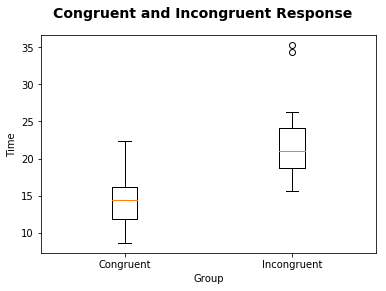

In [71]:
# Build the visualizations here
# Plotting using Boxplot

fig = plt.figure()
fig.suptitle('Congruent and Incongruent Response', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
data_to_plot = [df['Congruent'], df['Incongruent']]
ax.boxplot(data_to_plot)
ax.set_xticklabels(['Congruent', 'Incongruent'])
ax.set_xlabel('Group')
ax.set_ylabel('Time')

plt.show()

**From the polt above, the time it takes to name the Incongruent words is longer than the congruent group. In addition, there are two outliners in the incongruent group which makes the shape of the distribution to be positively skewed.**

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [58]:
# Perform the statistical test here
from scipy import stats

Congruent = df['Congruent']
Incongruent = df['Incongruent']
stats.ttest_rel(Congruent,Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [70]:
# Get the t critical value 95% confident level
stats.t.ppf(1-0.95, (len(df)-1)) # samples with n-1


-1.7138715277470473

**Confidence level value $\alpha$ is 0.05**

**Critical Statistics value = -1.71387**

**t-score = -8.0207**

**p_value = 4.1030005857111781e-08 --> zero**

**Since our p-value (almost zero) which means that there is  almost 0% chance to see the differnce in means between the two groups to be identical. In addition, the absolute value of the t-score (8.0207) is greater than the absolute critical value (1.71387).**

**Hence, we conclude that then we can reject our null hypothesis $H_0$ of that there is no difference in means between the two groups and we accept the alternative hypothesis $H_1$ that reading incongruent words takes more time than reading congruent words.**

**The result did match up with my expectations. It makes more sense that reading incongruent words takes more time than reading congruent words.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**According to Wikipedia [1], there are several theories used to explain the Stroop effect. **

**One of those theories is the Processing Speed:**

**"This theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors. This is based on the idea that word processing is significantly faster than color processing. In a condition where there is a conflict regarding words and colors (e.g., Stroop test), if the task is to report the color, the word information arrives at the decision-making stage before the color information which presents processing confusion. Conversely, if the task is to report the word, because color information lags after word information, a decision can be made ahead of the conflicting information."**

**A similar real-life example fo the stroop effect can be encountered emotionally:**

**"The emotional Stroop effect serves as an information processing approach to emotions. In an emotional Stroop task, an individual is given negative emotional words like "grief," "violence," and "pain" mixed in with more neutral words like "clock," "door," and "shoe".Just like in the original Stroop task, the words are colored and the individual is supposed to name the color. Research has revealed that individuals that are depressed are more likely to say the color of a negative word slower than the color of a neutral word.While both the emotional Stroop and the classic Stroop involve the need to suppress irrelevant or distracting information, there are differences between the two. The emotional Stroop effect emphasizes the conflict between the emotional relevance to the individual and the word; whereas, the classic Stroop effect examines the conflict between the incongruent color and word"**

[1]: https://en.wikipedia.org/wiki/Stroop_effect       "Wikipedia"
